# Import Section

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from keras import Sequential
from keras.layers import Dense, Dropout, LSTM


# Loading Dataset

In [11]:
FILE_PATH_TRAINING = "../dataset/UNSW_NB15_training-set.csv"
FILE_PATH_TESTING = "../dataset/UNSW_NB15_testing-set.csv"

df_training =   pd.read_csv(FILE_PATH_TRAINING)
df_testing =    pd.read_csv(FILE_PATH_TESTING)

# EDA

In [12]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [13]:
df_training.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [14]:
df_training['service']

0        -
1        -
2        -
3        -
4        -
        ..
82327    -
82328    -
82329    -
82330    -
82331    -
Name: service, Length: 82332, dtype: object

In [15]:
df_training.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


# Data Preprocessing

## Removing columns

In [16]:
columns_to_remove = ['id','proto','state','service','attack_cat']
df_training.drop(columns_to_remove, axis=1, inplace=True)
df_testing.drop(columns_to_remove, axis=1,inplace=True)


## Data Standardization

In [17]:
standard_scaler = StandardScaler()

for column in df_training.columns:
    if column != 'label':
        standard_scaler.fit(df_training[column].values.reshape(-1,1))
        df_training[column] = standard_scaler.transform(df_training[column].values.reshape(-1,1))
        df_testing[column] = standard_scaler.transform(df_testing[column].values.reshape(-1,1))

# Train Test Split

## Splitting

In [18]:
X_train = df_training.drop('label', axis=1)
y_train = df_training['label']

X_test = df_testing.drop('label', axis=1)
y_test = df_testing['label']



In [24]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((82332, 39), (82332,), (175341, 39), (175341,))

## Validation split

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape

# Model ANN

## Model

In [25]:
def get_model_ann():
  model = Sequential()
  model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(25, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

model_ann = get_model_ann()  

2023-10-12 21:16:00.846165: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-12 21:16:00.846662: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Train

In [28]:
history_ann = model_ann.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
1287/1287 [==============================] - 1s 997us/step - loss: 0.1095 - accuracy: 0.9558
Epoch 2/100
1287/1287 [==============================] - 1s 1ms/step - loss: 0.1078 - accuracy: 0.9563
Epoch 3/100
1287/1287 [==============================] - 1s 962us/step - loss: 0.1056 - accuracy: 0.9577
Epoch 4/100
1287/1287 [==============================] - 1s 1000us/step - loss: 0.1049 - accuracy: 0.9578
Epoch 5/100
1287/1287 [==============================] - 1s 1ms/step - loss: 0.1044 - accuracy: 0.9579
Epoch 6/100
1287/1287 [==============================] - 1s 1ms/step - loss: 0.1031 - accuracy: 0.9587
Epoch 7/100
1287/1287 [==============================] - 1s 1ms/step - loss: 0.1021 - accuracy: 0.9593
Epoch 8/100
1287/1287 [==============================] - 1s 1ms/step - loss: 0.1014 - accuracy: 0.9588
Epoch 9/100
1287/1287 [==============================] - 1s 1ms/step - loss: 0.1004 - accuracy: 0.9597
Epoch 10/100
1287/1287 [==============================] - 1s 1ms/s

## Predict

In [57]:
y_prediction_ann = model_ann.predict(X_test)


5480/5480 [==============================] - 3s 631us/step


In [58]:
threshold = 0.5
y_prediction_ann = np.where(y_prediction_ann > threshold, 1, 0)

In [59]:
print("ANN Accuracy: ", accuracy_score(y_test, y_prediction_ann))

ANN Accuracy:  0.887527731677132


## Confusion Matrix

In [60]:
print(classification_report(y_test, y_prediction_ann))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85     56000
           1       0.99      0.85      0.91    119341

    accuracy                           0.89    175341
   macro avg       0.87      0.91      0.88    175341
weighted avg       0.91      0.89      0.89    175341



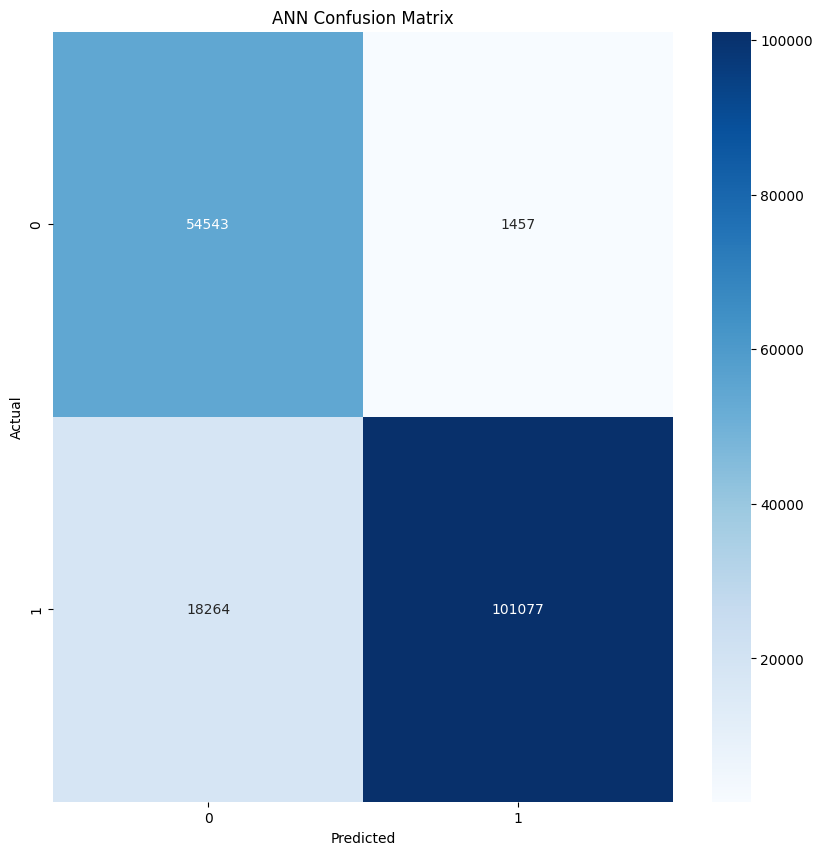

In [61]:
## give confusion matrix
cm_ann = confusion_matrix(y_test, y_prediction_ann)
##  plot it
plt.figure(figsize=(10,10))
plt.title('ANN Confusion Matrix')
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Random Forest

In [67]:

rf = RandomForestClassifier(n_estimators=100, n_jobs=50, random_state=42, verbose=1, criterion='entropy',warm_start=True)

rf.fit(X_train, y_train)

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 out of 100 | elapsed:    2.4s finished


RandomForestClassifier(criterion='entropy', n_jobs=50, random_state=42,
                       verbose=1, warm_start=True)

In [68]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.


Accuracy: 0.8986146993572525


[Parallel(n_jobs=50)]: Done 100 out of 100 | elapsed:    0.4s finished
